# Criação de Modelos de Machine Learning

A aplicação dos modelos de machine learning foi feita para o segmento identificado como o mais reclamado pelos consumidores: bancos financeiras e administradoras de cartão.


Importação de bibliotecas:

In [1]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
!pip install matplotlib
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
from pandas.api.types import is_numeric_dtype
plt.style.use('ggplot')
sns.set_style('whitegrid')
from os import path
from PIL import Image
!pip install wordcloud -q
!pip install sklearn-som
from sklearn_som.som import SOM
from numpy import random as np_random
!pip install numpy==1.19.2
from sklearn.cluster import KMeans
import plotly.graph_objs as go

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Importação da base de dados
db_consumidor = pd.read_csv('dataset_consumidor.gov.csv', sep=';', encoding='utf-8', decimal=',')

In [3]:
#Exibição da base
db_consumidor.head()

,Gestor,Canal de Origem,Região,UF,Cidade,Sexo,Faixa Etária,Ano Abertura,Mês Abertura,Data Abertura,...,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Análise da Recusa,Unnamed: 30
0,Programa Estadual de Proteção e Defesa do Cons...,Plataforma Web,NE,CE,Fortaleza,M,entre 31 a 40 anos,2021.0,1.0,01/01/2021,...,Cobrança / Contestação,Cobrança por serviço não fornecido/ em desacor...,Internet,N,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,NaN
1,Departamento Estadual de Proteção e Defesa do ...,Plataforma Web,S,PR,Curitiba,M,entre 21 a 30 anos,2021.0,1.0,01/01/2021,...,Atendimento / SAC,SAC - Demanda não resolvida / não respondida /...,Não comprei / contratei,S,S,Finalizada avaliada,Não Resolvida,1.0,NaN,NaN
2,Fundação de Proteção e Defesa do Consumidor,Plataforma Web,SE,SP,Guarulhos,F,entre 21 a 30 anos,2021.0,1.0,01/01/2021,...,Vício de Qualidade,Suspensão ou desligamento indevido do serviço,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,NaN
3,Instituto Municipal de Proteção e Defesa do Co...,Plataforma Web,SE,RJ,Rio de Janeiro,F,entre 31 a 40 anos,2021.0,1.0,01/01/2021,...,Entrega do Produto,Não entrega / demora na entrega do produto,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,NaN
4,Secretaria de Estado da Justiça e Cidadania de...,Plataforma Web,S,SC,Balneário Camboriú,M,entre 31 a 40 anos,2021.0,1.0,01/01/2021,...,Cobrança / Contestação,Negativação indevida (não cumprimento de acord...,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,NaN


# - Tratamento e limpeza dos dados

In [4]:
#Seleção do segmento de mercado escolhido

bancos=db_consumidor[db_consumidor['Segmento de Mercado']=='Bancos, Financeiras e Administradoras de Cartão']

In [5]:
#Exibição da base do segmento escolhido

bancos.head()

,Gestor,Canal de Origem,Região,UF,Cidade,Sexo,Faixa Etária,Ano Abertura,Mês Abertura,Data Abertura,...,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Análise da Recusa,Unnamed: 30
4,Secretaria de Estado da Justiça e Cidadania de...,Plataforma Web,S,SC,Balneário Camboriú,M,entre 31 a 40 anos,2021.0,1.0,01/01/2021,...,Cobrança / Contestação,Negativação indevida (não cumprimento de acord...,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,NaN
5,Secretaria Nacional do Consumidor,Plataforma Web,N,PA,Capitão Poço,M,até 20 anos,2021.0,1.0,01/01/2021,...,Atendimento / SAC,SAC - Dificuldade para cancelar o serviço,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,NaN
6,Programa Estadual de Proteção e Defesa do Cons...,Plataforma Web,NE,CE,Fortaleza,F,mais de 70 anos,2021.0,1.0,01/01/2021,...,Vício de Qualidade,Dificuldade para alterar/ ativar serviços,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,NaN
11,Secretaria de Justiça e Direitos Humanos - Sec...,Plataforma Web,NE,PE,Olinda,F,entre 41 a 50 anos,2021.0,1.0,01/01/2021,...,Cobrança / Contestação,Renegociação / parcelamento de dívida,Loja física,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,NaN
15,Departamento Estadual de Proteção e Defesa do ...,Plataforma Web,S,PR,Alto Piquiri,F,entre 21 a 30 anos,2021.0,1.0,01/01/2021,...,Cobrança / Contestação,Cobrança indevida / abusiva para alterar ou ca...,Loja física,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,NaN


In [6]:
#Exclusão de features que não serão utilizadas no modelo

bancos=bancos.drop(columns=['Unnamed: 30','Data Análise','Data Recusa','Prazo Analise Gestor','Nota do Consumidor',
                            'Análise da Recusa','Gestor','Cidade','Ano Abertura','Mês Abertura','Data Resposta',
                            'Prazo Resposta','Tempo Resposta','Nome Fantasia','Problema','Avaliação Reclamação',
                            'Segmento de Mercado'])

In [7]:
# Criação de novo atributo que será utilizado no modelo que totaliza o prazo de tratamento das demandas

bancos['Tempo Total'] = pd.to_datetime(bancos['Data Finalização'], format='%d/%m/%Y') - pd.to_datetime(bancos['Data Abertura'], format='%d/%m/%Y')
                               
bancos['Tempo Total'] = bancos['Tempo Total'] / timedelta (days=1)

In [8]:
#Exclusão de outros atributos após a criação do "Tempo Total"

bancos=bancos.drop(columns=['Data Abertura','Data Finalização'])

In [9]:
bancos.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Canal de Origem,31890,3,Plataforma Web,31449,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Região,31890,5,SE,12637,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UF,31890,27,SP,7005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sexo,31886,3,M,16483,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Faixa Etária,31890,7,entre 31 a 40 anos,7129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Área,31890,7,Serviços Financeiros,31458,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Assunto,31890,44,Crédito Consignado / Cartão de Crédito Consign...,9484,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grupo Problema,31890,7,Cobrança / Contestação,15295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Como Comprou Contratou,31890,9,Não comprei / contratei,14537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Procurou Empresa,31890,2,S,22280,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
bancos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31890 entries, 4 to 121726
Data columns (total 13 columns):
Canal de Origem           31890 non-null object
Região                    31890 non-null object
UF                        31890 non-null object
Sexo                      31886 non-null object
Faixa Etária              31890 non-null object
Área                      31890 non-null object
Assunto                   31890 non-null object
Grupo Problema            31890 non-null object
Como Comprou Contratou    31890 non-null object
Procurou Empresa          31890 non-null object
Respondida                31890 non-null object
Situação                  31890 non-null object
Tempo Total               31890 non-null float64
dtypes: float64(1), object(12)
memory usage: 3.4+ MB


# - Conversão dos dados para valores numéricos

In [11]:
#Conversão para valores numéricos

def str2num(val):
    global uniqs

    for i in range(len(uniqs)):
        if uniqs[i] == val:
            return i+1
    return 0

if 'trans' not in globals():
    for col in bancos.columns:
        if not is_numeric_dtype(bancos[col].dtypes):
            uniqs = bancos[col].value_counts().index
            bancos[col] = bancos[col].apply(str2num)
    trans = True

In [12]:
bancos.head()

,Canal de Origem,Região,UF,Sexo,Faixa Etária,Área,Assunto,Grupo Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Tempo Total
4,1,4,9,1,1,1,2,1,1,1,1,1,35.0
5,1,5,15,1,7,1,2,3,3,1,1,1,36.0
6,1,2,14,2,6,1,2,4,3,1,1,1,33.0
11,1,2,13,2,5,1,2,1,2,1,1,1,35.0
15,1,4,4,2,3,2,11,1,2,1,1,1,33.0


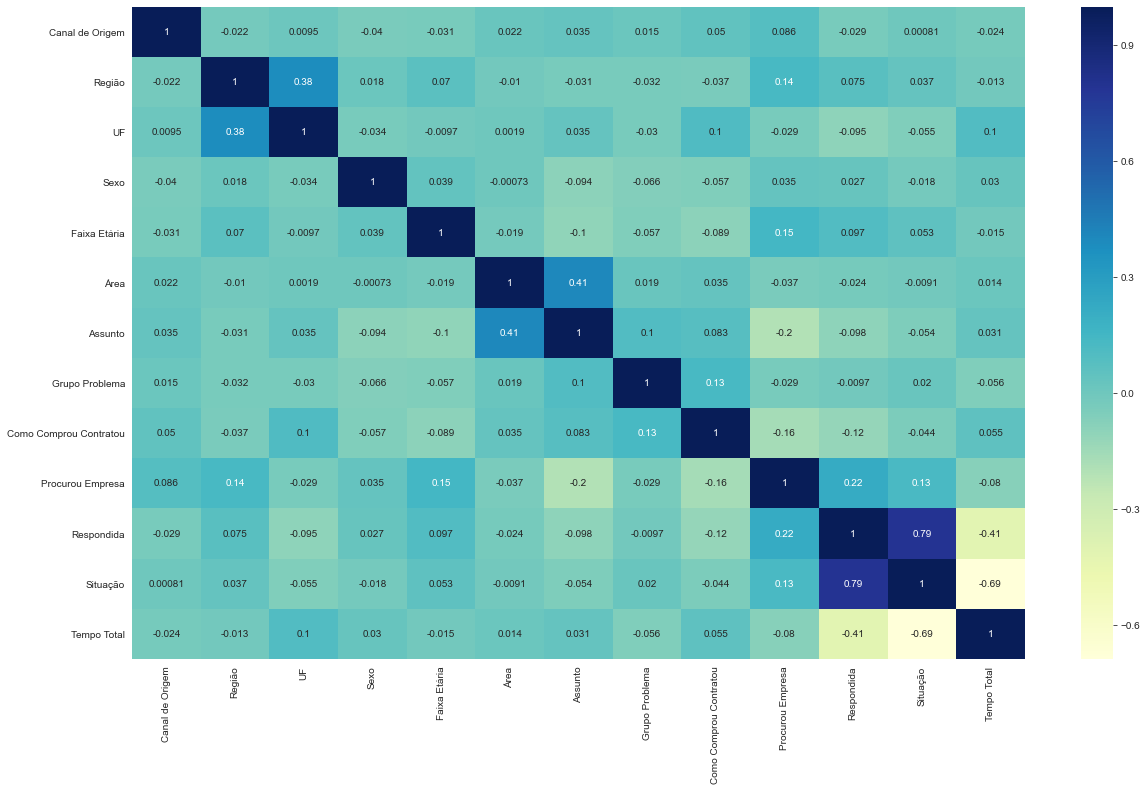

In [13]:
#Gráfico de correlação

fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(bancos.corr(), cmap='YlGnBu', annot=True, ax=ax)
fig.savefig('Consumidor - Dataset Tratado.png')
fig.savefig('Consumidor - Dataset Tratado.jpg')
fig.savefig('Consumidor - Dataset Tratado.eps')

# Algoritmos de agrupamento utilizados no projeto

## K-Means

In [14]:
#Armazenamento das variáveis
X = bancos.iloc[:, 0:4].values
X

array([[ 1,  4,  9,  1],
       [ 1,  5, 15,  1],
       [ 1,  2, 14,  2],
       ...,
       [ 1,  2, 12,  1],
       [ 1,  1,  3,  1],
       [ 1,  1,  1,  1]], dtype=int64)

## - Indicação do n° ideal de clusters

1 1054423.1971464122
2 329213.14543498587
3 174697.20017887471
4 121457.39065972815
5 91369.50274284721
6 74828.84840217984
7 63312.199319642925
8 54657.37712700052
9 42981.98704495934
10 36330.22848945504


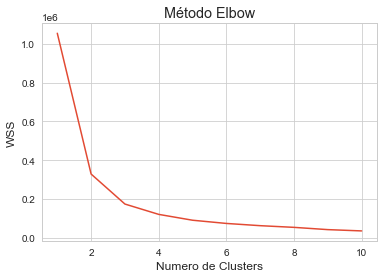

In [15]:
#Método do cotovelo

wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('Método Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [16]:
#Inicialização do k-means
kmeans = KMeans(n_clusters = 3, init = 'random')

In [17]:
#Método fit() para agrupamento
kmeans.fit(X)

KMeans(init='random', n_clusters=3)

In [18]:
#Verificação dos centroides dos clusters
kmeans.cluster_centers_

array([[ 1.01265114,  2.90976265,  8.3841245 ,  1.49552172],
       [ 1.01973684,  2.89555921, 17.01932566,  1.44305099],
       [ 1.01685642,  1.80236543,  2.4190892 ,  1.48789654]])

In [19]:
#Distância em relação a cada cluster
distance = kmeans.fit_transform(X)
distance

array([[ 2.22588102,  7.26665362,  7.40535975],
       [ 8.02815693, 13.31526734,  2.61863832],
       [ 6.68108237, 11.95451908,  2.47386325],
       ...,
       [ 4.69648342,  9.95619306,  4.37874285],
       [ 4.66272605,  1.40447493, 13.411991  ],
       [ 6.57228202,  1.48271909, 15.39584969]])

In [20]:
# o código do cluster que a instância de dados foi atribuído
labels = kmeans.labels_
labels

array([0, 2, 2, ..., 2, 1, 1])

In [21]:
algorithm = (KMeans(n_clusters = 3))
algorithm.fit(X)

KMeans(n_clusters=3)

In [22]:
bancos["clusters"] = algorithm.labels_
bancos.head()

,Canal de Origem,Região,UF,Sexo,Faixa Etária,Área,Assunto,Grupo Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Tempo Total,clusters
4,1,4,9,1,1,1,2,1,1,1,1,1,35.0,2
5,1,5,15,1,7,1,2,3,3,1,1,1,36.0,0
6,1,2,14,2,6,1,2,4,3,1,1,1,33.0,0
11,1,2,13,2,5,1,2,1,2,1,1,1,35.0,0
15,1,4,4,2,3,2,11,1,2,1,1,1,33.0,1


## SOM - Self Organizing Maps

## - Criação do Modelo SOM

In [23]:
bancos_som = SOM(m=3, n=1, dim=len(bancos.columns))

## - Treinamento do Modelo SOM

In [24]:
bancos_X = bancos.iloc[:, :].values
bancos_som.fit(bancos_X)

## - Predições do Modelo SOM

In [25]:
predictions = bancos_som.predict(bancos_X)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

(array([14057.,     0.,     0.,     0.,     0.,  7419.,     0.,     0.,
            0., 10414.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

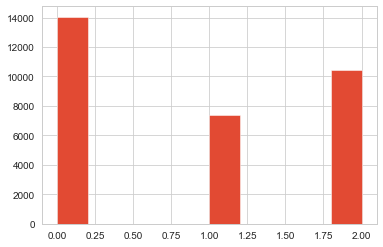

In [26]:
plt.hist(predictions)

In [27]:
bancos_classes = bancos.copy()
bancos_classes['Classe'] = predictions
bancos_classes = bancos_classes.sort_values(by=['Classe'])

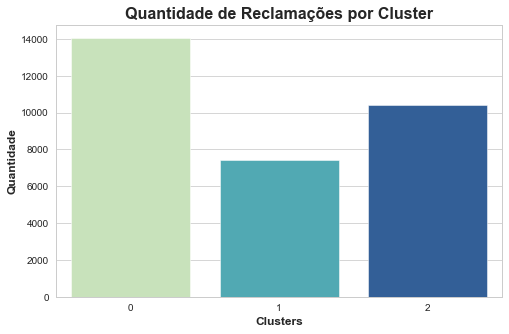

In [28]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(bancos_classes['Classe'], palette='YlGnBu')
plt.title('Quantidade de Reclamações por Cluster', fontsize=16, fontweight='bold')
ax.set_xlabel('Clusters', fontsize=12, fontweight='bold')
ax.set_ylabel('Quantidade', fontsize=12, fontweight='bold')
plt.show()
fig.savefig('clusters_size.png')

# Apresentação dos resultados da clusterização

 Visualização a partir das classes estabelecidas pelo modelo SOM

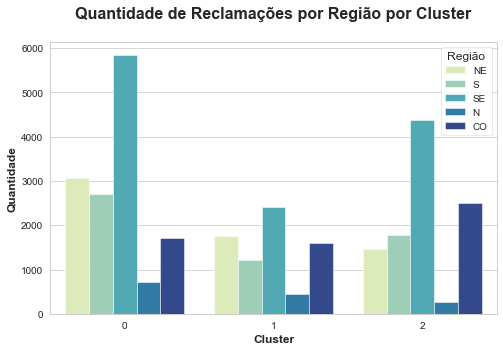

In [29]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(bancos_classes['Classe'], hue=db_consumidor['Região'], palette='YlGnBu')
plt.title('Quantidade de Reclamações por Região por Cluster\n', fontsize=16, fontweight='bold')
ax.set_xlabel('Cluster', fontsize=12, fontweight='bold')
ax.set_ylabel('Quantidade', fontsize=12, fontweight='bold')
plt.show()
fig.savefig('clusters_banco_regiao.png')

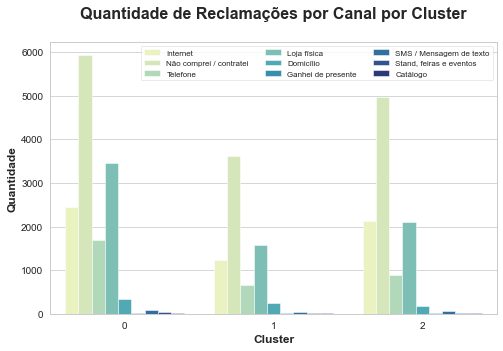

In [30]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(bancos_classes['Classe'], hue=db_consumidor['Como Comprou Contratou'], palette='YlGnBu')
plt.title('Quantidade de Reclamações por Canal por Cluster\n', fontsize=16, fontweight='bold')
ax.set_xlabel('Cluster', fontsize=12, fontweight='bold')
ax.set_ylabel('Quantidade', fontsize=12, fontweight='bold')
ax.legend(loc=1,ncol=3, fontsize=8)
plt.show()
fig.savefig('clusters_banco_canal.png')

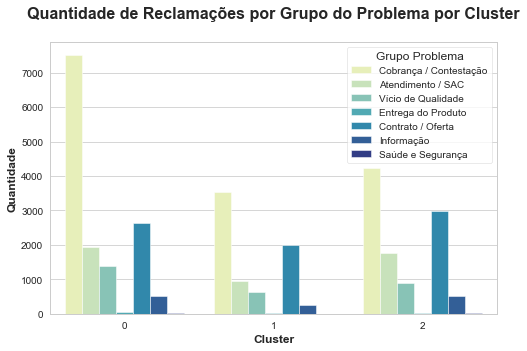

In [31]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(bancos_classes['Classe'], hue=db_consumidor['Grupo Problema'], palette='YlGnBu')
plt.title('Quantidade de Reclamações por Grupo do Problema por Cluster\n', fontsize=16, fontweight='bold')
ax.set_xlabel('Cluster', fontsize=12, fontweight='bold')
ax.set_ylabel('Quantidade', fontsize=12, fontweight='bold')
plt.show()
fig.savefig('clusters_banco_grupo.png')

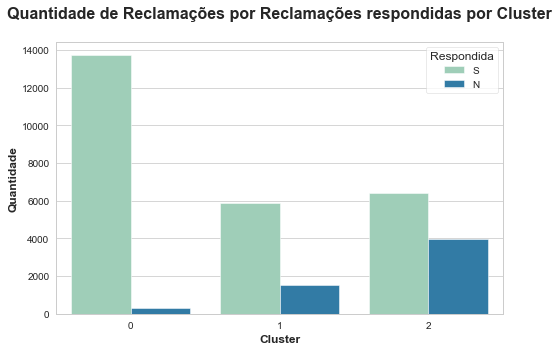

In [32]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(bancos_classes['Classe'], hue=db_consumidor['Respondida'], palette='YlGnBu')
plt.title('Quantidade de Reclamações por Reclamações respondidas por Cluster\n', fontsize=16, fontweight='bold')
ax.set_xlabel('Cluster', fontsize=12, fontweight='bold')
ax.set_ylabel('Quantidade', fontsize=12, fontweight='bold')
plt.show()
fig.savefig('clusters_banco_respondidas.png')

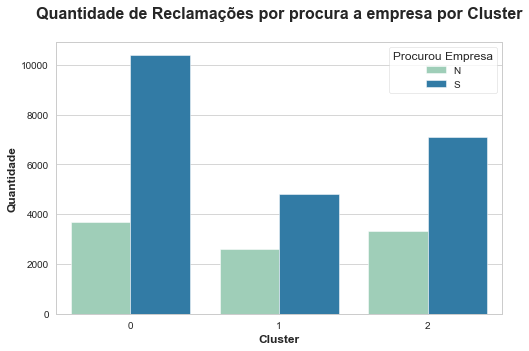

In [33]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(bancos_classes['Classe'], hue=db_consumidor['Procurou Empresa'], palette='YlGnBu')
plt.title('Quantidade de Reclamações por procura a empresa por Cluster\n', fontsize=16, fontweight='bold')
ax.set_xlabel('Cluster', fontsize=12, fontweight='bold')
ax.set_ylabel('Quantidade', fontsize=12, fontweight='bold')
plt.show()
fig.savefig('clusters_banco_procura.png')

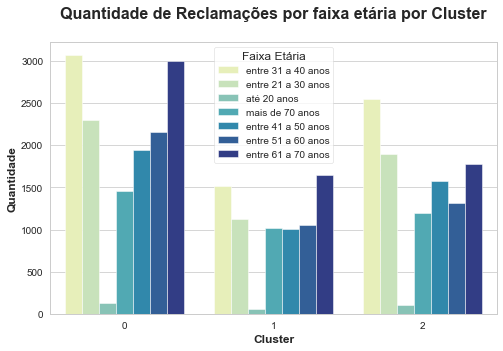

In [34]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(bancos_classes['Classe'], hue=db_consumidor['Faixa Etária'], palette='YlGnBu')
plt.title('Quantidade de Reclamações por faixa etária por Cluster\n', fontsize=16, fontweight='bold')
ax.set_xlabel('Cluster', fontsize=12, fontweight='bold')
ax.set_ylabel('Quantidade', fontsize=12, fontweight='bold')
plt.show()
fig.savefig('clusters_banco_idade.png')

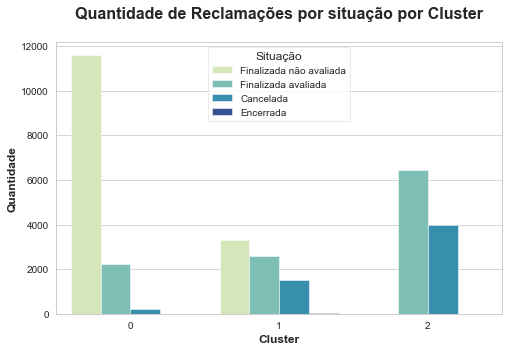

In [35]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(bancos_classes['Classe'], hue=db_consumidor['Situação'], palette='YlGnBu')
plt.title('Quantidade de Reclamações por situação por Cluster\n', fontsize=16, fontweight='bold')
ax.set_xlabel('Cluster', fontsize=12, fontweight='bold')
ax.set_ylabel('Quantidade', fontsize=12, fontweight='bold')
plt.show()
fig.savefig('clusters_banco_situacao.png')

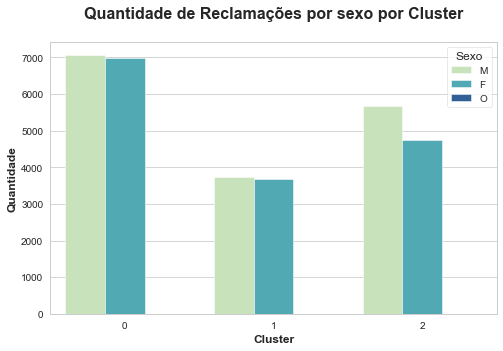

In [36]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(bancos_classes['Classe'], hue=db_consumidor['Sexo'], palette='YlGnBu')
plt.title('Quantidade de Reclamações por sexo por Cluster\n', fontsize=16, fontweight='bold')
ax.set_xlabel('Cluster', fontsize=12, fontweight='bold')
ax.set_ylabel('Quantidade', fontsize=12, fontweight='bold')
plt.show()
fig.savefig('clusters_banco_sexo.png')

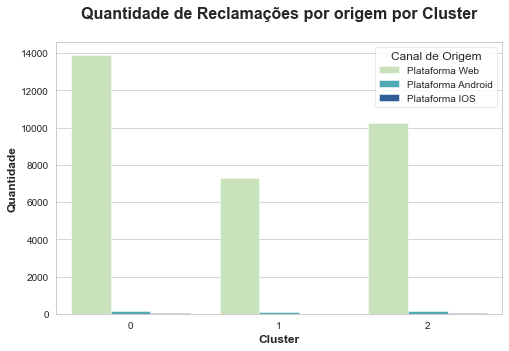

In [37]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(bancos_classes['Classe'], hue=db_consumidor['Canal de Origem'], palette='YlGnBu')
plt.title('Quantidade de Reclamações por origem por Cluster\n', fontsize=16, fontweight='bold')
ax.set_xlabel('Cluster', fontsize=12, fontweight='bold')
ax.set_ylabel('Quantidade', fontsize=12, fontweight='bold')
plt.show()
fig.savefig('clusters_banco_origem.png')

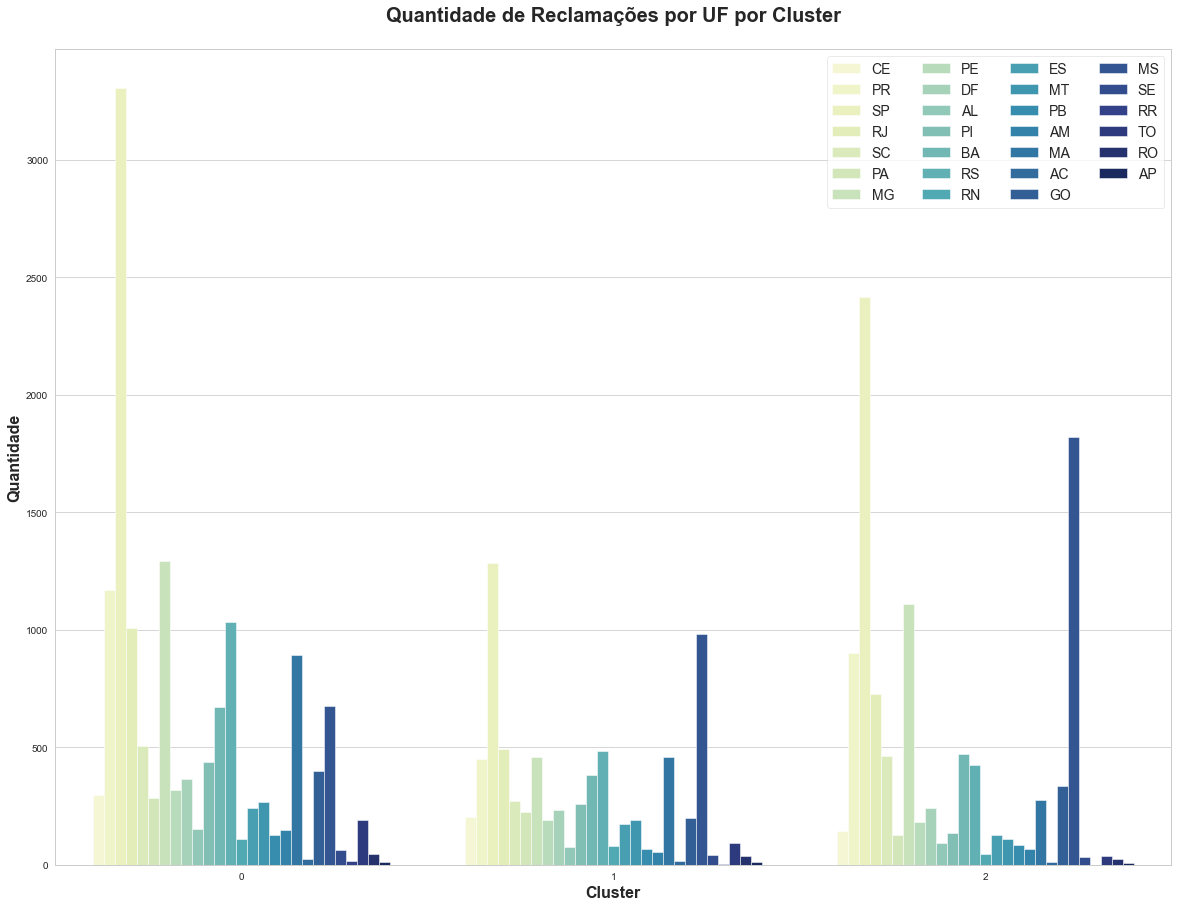

In [38]:
fig, ax = plt.subplots(figsize=(20,15))
sns.countplot(bancos_classes['Classe'], hue=db_consumidor['UF'], palette='YlGnBu')
plt.title('Quantidade de Reclamações por UF por Cluster\n', fontsize=20, fontweight='bold')
ax.set_xlabel('Cluster', fontsize=16, fontweight='bold')
ax.set_ylabel('Quantidade', fontsize=16, fontweight='bold')
ax.legend(loc=1,ncol=4, fontsize=14)
plt.show()
fig.savefig('clusters_banco_UF.png')